In [1]:
import pandas as pd
import zipfile
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

# Data Cleaning and Transformation

In [3]:
def read_datasets(zipf):
    datasets = {}
    with zipfile.ZipFile(zipf, "r") as arch:
        datafiles = [datafile for datafile in arch.namelist() if datafile.split(".")[1] == "csv"]
        for datafile in datafiles:
            datasets[datafile.split(".")[0]] = pd.read_csv(arch.open(datafile))
    return datasets

In [4]:
## 1. Check for dtype of two columns
def height_weight_dtype(datasets):    
    for key, dataset in datasets.items():
        if(dataset["height_cm"].dtype == 'int64' and dataset["weight_kg"].dtype == 'int64'):
            print(f"{key} => Columns : Height and Weight are of type int64")

In [5]:
## 2. Break date column into multiple columns
def split_date_cols(datasets):
    for key, dataset in datasets.items():
        dataset[["joined_y","joined_d","joined_m"]] = dataset["joined"].str.split("-", expand=True)
        print(dataset.loc[:, ["joined","joined_y","joined_m", "joined_d"]])

In [6]:
## 3. Clean and transform specific columns
def clean_and_transform_cols(datasets):
    for key, dataset in datasets.items():
        dataset.fillna({"release_clause_eur":0, "wage_eur":0, "value_eur":0}, inplace=True)
        dataset = dataset.astype({"release_clause_eur":'int', "wage_eur":'int', "value_eur":'int'})

In [7]:
datasets = read_datasets("archive.zip")

In [8]:
height_weight_dtype(datasets)

players_15 => Columns : Height and Weight are of type int64
players_16 => Columns : Height and Weight are of type int64
players_17 => Columns : Height and Weight are of type int64
players_18 => Columns : Height and Weight are of type int64
players_19 => Columns : Height and Weight are of type int64
players_20 => Columns : Height and Weight are of type int64
players_21 => Columns : Height and Weight are of type int64


In [9]:
split_date_cols(datasets)

           joined joined_y joined_m joined_d
0      2004-07-01     2004       01       07
1      2009-07-01     2009       01       07
2      2009-08-28     2009       28       08
3      2012-07-01     2012       01       07
4      2011-07-01     2011       01       07
...           ...      ...      ...      ...
16150  2013-10-22     2013       22       10
16151  2014-08-14     2014       14       08
16152  2012-07-01     2012       01       07
16153  2014-03-11     2014       11       03
16154  2006-06-26     2006       26       06

[16155 rows x 4 columns]
           joined joined_y joined_m joined_d
0      2004-07-01     2004       01       07
1      2009-07-01     2009       01       07
2      2009-08-28     2009       28       08
3      2011-07-01     2011       01       07
4      2014-07-11     2014       11       07
...           ...      ...      ...      ...
15618  2015-01-01     2015       01       01
15619  2015-07-24     2015       24       07
15620  2015-02-21     2015   

In [10]:
clean_and_transform_cols(datasets)


# Data Visulaisation

1. AGE CLASSIFICATION

In [11]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [13]:
def age_classification_pie(datasets):
    for key, dataset in datasets.items():
        data = dataset.groupby(pd.cut(dataset['age'], np.arange(15,55,5)))['sofifa_id'].count()
        ser = pd.Series(data)
        values = ser.values
        labels = ser.index
        break
    return values, labels

In [14]:
values, labels = age_classification_pie(datasets)

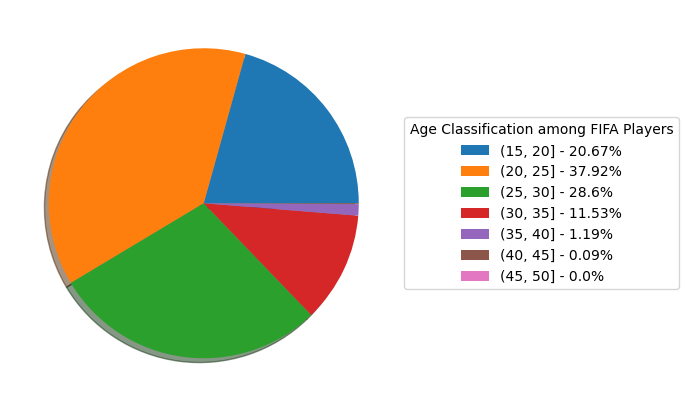

In [15]:
fig, ax = plt.subplots(figsize=(5, 15), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(values, textprops={'size':'smaller','color':'black'}, shadow=True)

pct = [round(value*100/values.sum(),2) for value in values]

labels_customised = [f"{labels[i]} - {pct[i]}%" for i in range(0,len(pct))]


ax.legend(wedges, labels_customised,
          title="Age Classification among FIFA Players",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


2. TOP 10 HIGHEST PAID PLAYERS IN A GIVEN YEAR

Please provide the year between 2015 - 2021: 2021


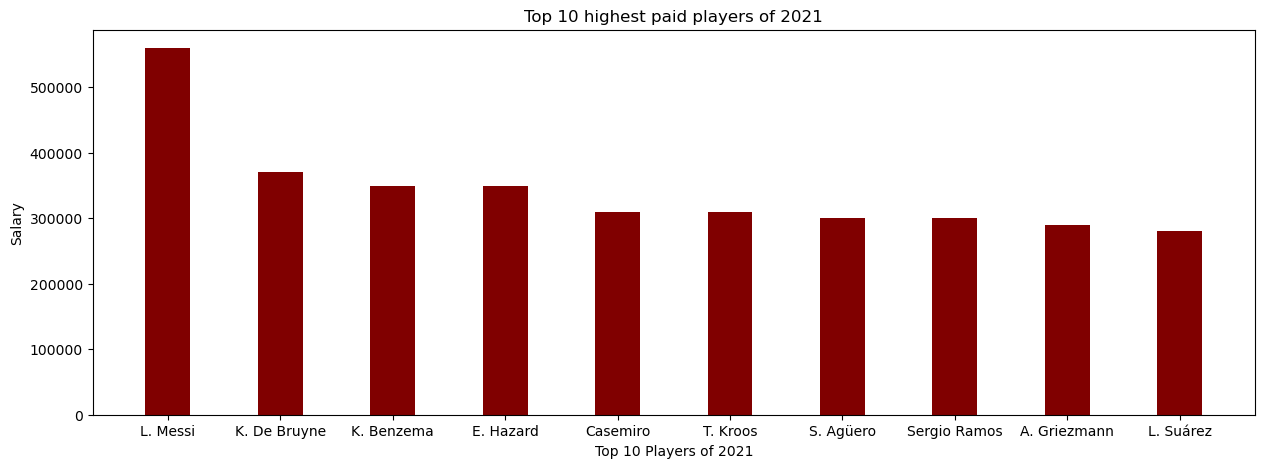

In [29]:
def top10_highest_paid(year, datasets):
    result = {}
    dataset = datasets[f"players_{year[-2:]}"]
    top10_df = dataset.nlargest(10,'wage_eur')[['short_name','wage_eur']]
    
    xvalues = top10_df["short_name"]
    yvalues = top10_df["wage_eur"]
    
    fig = plt.figure(figsize = (15, 5))
    
    plt.bar(xvalues, yvalues, color ='maroon',
        width = 0.4)
    
    
    plt.xlabel(f"Top 10 Players of {year}")
    plt.ylabel("Salary")
    plt.title(f"Top 10 highest paid players of {year}")
    
    
year = input("Please provide the year between 2015 - 2021: ")   
top10_highest_paid(year, datasets)

    

3. CHANGE IN ATTRIBUTES OF A PLAYER OVER THE YEARS

{'pace': [93.0, 92.0, 92.0, 90.0, 90.0, 90.0, 89.0], 'shooting': [93.0, 93.0, 92.0, 93.0, 93.0, 93.0, 93.0], 'passing': [81.0, 80.0, 81.0, 82.0, 81.0, 82.0, 81.0], 'dribbling': [91.0, 91.0, 91.0, 90.0, 89.0, 89.0, 89.0], 'defending': [32.0, 33.0, 33.0, 33.0, 35.0, 35.0, 35.0], 'physic': [79.0, 78.0, 80.0, 80.0, 79.0, 78.0, 77.0]}
[0 1 2 3 4 5 6]
[93.0, 92.0, 92.0, 90.0, 90.0, 90.0, 89.0]
[0 1 2 3 4 5 6]
[93.0, 93.0, 92.0, 93.0, 93.0, 93.0, 93.0]
[0 1 2 3 4 5 6]
[81.0, 80.0, 81.0, 82.0, 81.0, 82.0, 81.0]
[0 1 2 3 4 5 6]
[91.0, 91.0, 91.0, 90.0, 89.0, 89.0, 89.0]
[0 1 2 3 4 5 6]
[32.0, 33.0, 33.0, 33.0, 35.0, 35.0, 35.0]
[0 1 2 3 4 5 6]
[79.0, 78.0, 80.0, 80.0, 79.0, 78.0, 77.0]


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (6).

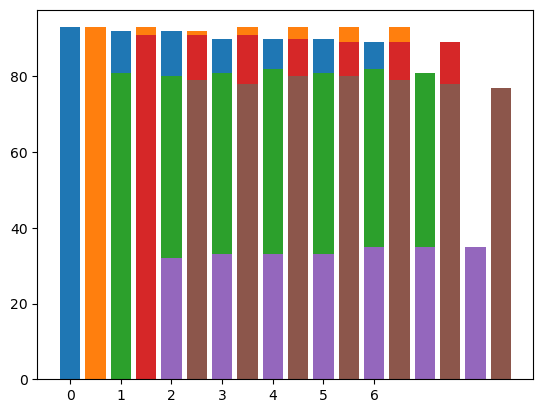

In [28]:
legend_items = datasets["players_15"].keys()[33:39]

attributes = {}

for i,dataset in datasets.items():
    df = dataset[dataset['short_name']=='Cristiano Ronaldo'].iloc[:,33:39]
    for x,y in df.items():
        attributes.setdefault(x,[]).append(y.values[0])
    
X_axis = np.arange(7)

print(attributes)

multiplier = 0
width = 0.5
for attribute,values in attributes.items():
    print(X_axis)
    print(values)
    offset = width * multiplier
    plt.bar(X_axis + offset, values, 0.4, label = attribute)
    multiplier +=1
    
plt.xticks(X_axis, legend_items)
plt.xlabel("Attributes")
plt.ylabel("Values")
plt.title("Change in attributes")
plt.legend()

